This file is used for fitting the curve of the avaerage value of bottom 5% of NO2 concentration data for each temperature.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Get the raw value of O3 concentration and corresponding temperature for each node at each timestamp.
o3_temp = pd.read_csv('data/TEMP_O3_raw_hrf.csv',header = 0, index_col=0)

In [5]:
o3_temp = o3_temp.rename({'value_raw_x':'o3_raw', 'value_hrf_x':'o3_hrf','value_raw_y':'temp_raw','value_hrf_y':'temp'}, axis =1) 

In [6]:
o3_temp.head()

timestamp       node_id  o3_raw   o3_hrf  temp_raw   temp
4   2018/10/01 00:00:01  001e06114fd4  1478.0  0.01385     786.0  17.20
8   2018/10/01 00:00:02  001e0610ba46  1666.0  0.01099     806.0  19.70
13  2018/10/01 00:00:02  001e0610f703 -1080.0 -0.04350     786.0  17.20
17  2018/10/01 00:00:02  001e061144c0  2150.0  0.03118     802.0  19.20
21  2018/10/01 00:00:04  001e0610ee33  1848.0      NaN     787.0  17.35

In [7]:
o3_temp.timestamp = pd.to_datetime(o3_temp.timestamp)

In [8]:
# The time span is from 2018-10-01 to 2019-07-31.
o3_temp.timestamp.describe()

count                28506996
unique               12973725
top       2019-01-11 11:30:32
freq                      634
first     2018-10-01 00:00:01
last      2019-07-31 23:59:58
Name: timestamp, dtype: object

In [9]:
# We have 65 nodes that contain information of NO2 concentration from 2018-10-01 to 2019-07-31.
o3_temp['node_id'].nunique()

65

In [10]:
o3_temp.groupby('node_id').describe()

o3_raw                                                      \
                  count           mean            std        min        25%   
node_id                                                                       
001e06109401    34750.0   -4552.542417   10709.756053  -156361.0   -6475.00   
001e06109416   192179.0    2168.126596    1111.973380    -7181.0    1527.00   
001e0610b9e9    58966.0    2001.780229    3948.631764    -6437.0    1381.00   
001e0610ba13   975426.0    1837.185615    1054.901354    -1207.0    1373.00   
001e0610ba15  1393296.0     953.104782    2160.459279   -28245.0     281.00   
001e0610ba16   215713.0 -123630.775313  157385.780760  -367817.0 -367817.00   
001e0610ba46  1229548.0    3257.431453    1368.268834   -10511.0    2607.00   
001e0610bbf9    25651.0    -849.204553    3901.702803  -245855.0   -2021.50   
001e0610bc10   891483.0    3240.895709   22478.059220  -367817.0     513.00   
001e0610bc12   104408.0   12452.642298   26303.597314   -19838.0     558.00   
001e0610e532    26331.0   14418.573772  120367.756322 -7801046.0     974.00   
001e0610e537  1727600.0    3259.090696    1752.856847    -1056.0    2615.00   
001e0610e539   166507.0    2142.830740    1855.129399    -1237.0    1616.00   
001e0610e835   699311.0     948.684628    3530.069989  -171762.0     623.00   
001e0610e8cb    54841.0    2736.629219   26084.344094  -354346.0     357.00   
001e0610ee33  1564242.0    1625.656668     775.880543   -20212.0    1326.00   
001e0610ee43  1726472.0    3318.138441    1174.830739     -405.0    2661.00   
001e0610ee5d    48543.0    3160.407906    3195.777113   -19166.0    2063.50   
001e0610ee82   237573.0    2396.173888    1054.156656    -3259.0    1775.00   
001e0610eef2   915543.0    2178.798459   13806.955867  -367817.0    1364.00   
001e0610ef27  1005570.0    6445.531531   24637.098125  -367817.0     115.00   
001e0610f02f    63662.0   15346.385112   29655.131682  -176226.0    1725.00   
001e0610f05c  1392894.0  -13642.242288   73033.303279  -367817.0    2527.00   
001e0610f6db  1276460.0    2340.342075     846.111532     -840.0    1892.00   
001e0610f703   432066.0    1646.400941   16307.082766  -367701.0     171.00   
001e0610f732    89852.0    2719.409941    4159.850863   -25305.0     311.00   
001e06112e77   295076.0    2086.692520    1765.885029   -25426.0    1584.00   
001e061130f4  1472364.0    1289.472764    1602.840502   -44695.0     760.00   
001e06113107  1213716.0    3333.924946    1409.261433    -2254.0    2612.00   
001e061135cb   201510.0     664.135978   13080.896648  -367817.0     829.00   
...                 ...            ...            ...        ...        ...   
001e06113d78    30459.0      25.808989    1910.242789    -9881.0    -602.00   
001e06113dbc   526913.0   -2824.398846   18928.669176  -367817.0    -797.00   
001e06113f54    28682.0    2925.270065    1290.255161     -547.0    2094.00   
001e0611441e     1028.0    1557.611868   11848.631332    -1166.0     523.75   
001e061144be    34844.0    3883.004764    4360.069078      -24.0    2856.00   
001e061144c0  1036776.0    1303.620005    7256.249913  -367817.0     617.00   
001e061144d6    52017.0    2128.000807    3847.683113  -151462.0    2105.00   
001e06114500  1007093.0    1777.159661    8213.313318   -94308.0     248.00   
001e06114503   435443.0     433.012020   12113.200958  -367817.0     665.00   
001e0611462f   132441.0    1719.960209    4279.756368   -27192.0     545.00   
001e061146bc   456139.0    2266.925409    3219.152170  -125366.0    1670.00   
001e061146cb   232145.0    3973.465308    1125.240175      680.0    3186.00   
001e06114fcf   215228.0    1230.199691    7276.126536  -179629.0     629.00   
001e06114fd4   813172.0    1213.669471    2953.732567   -37293.0     802.00   
001e06115365   164613.0    1588.280361     934.836854    -4621.0     970.00   
001e06115369    31010.0    5530.124186    7257.765263      430.0    2847.00   
001e0611537d   124548.0    4047.160974    1833.982858      664.0   

In [11]:
#Get dataframes for each node and save it into a dictionary.
nodes={}
for node_id in o3_temp['node_id'].unique():
    nodes[node_id] = o3_temp[o3_temp['node_id'] == node_id]
    o3_temp[o3_temp['node_id'] == node_id].to_csv('nodedata_O3/'+str(node_id)+'.csv')

In [12]:
nodes = list(o3_temp['node_id'].unique())

In [13]:
def func(x, a, b, c):
    return a*np.exp(b*x)+c

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


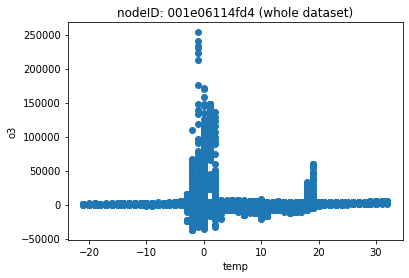

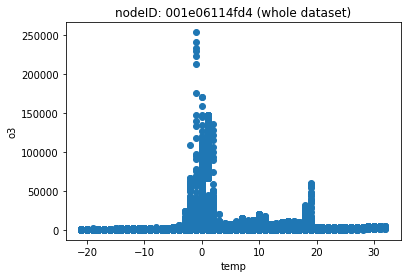

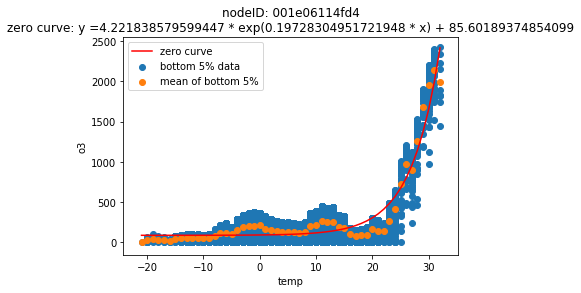

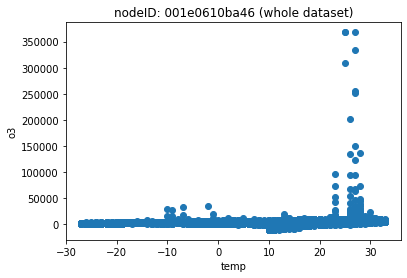

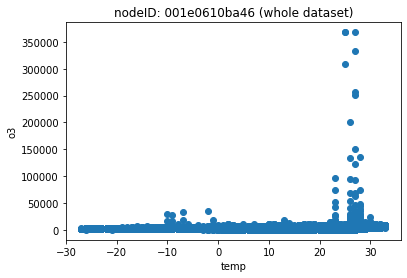

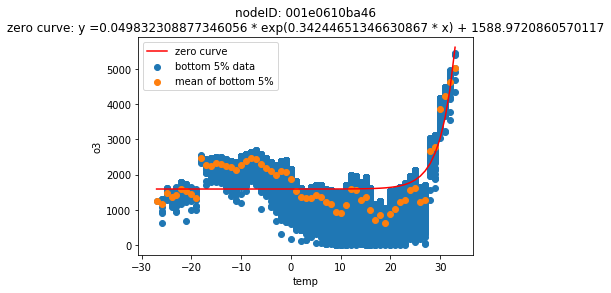

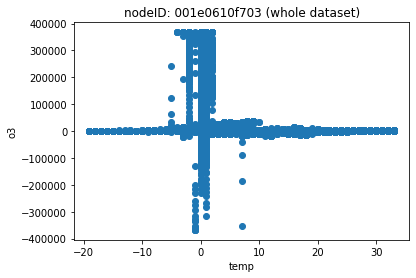

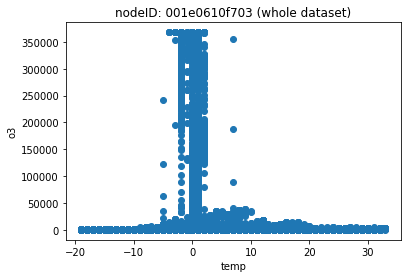

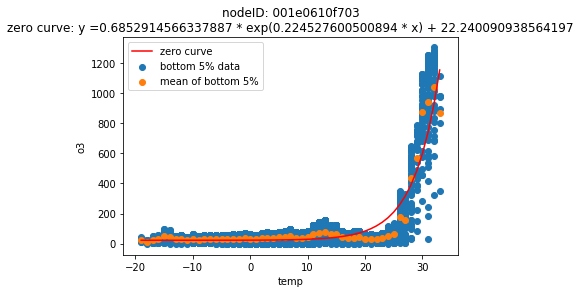

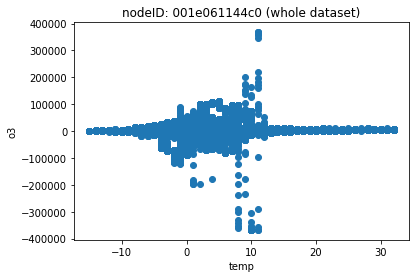

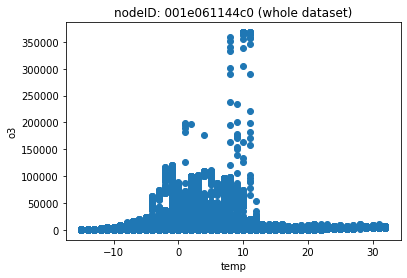

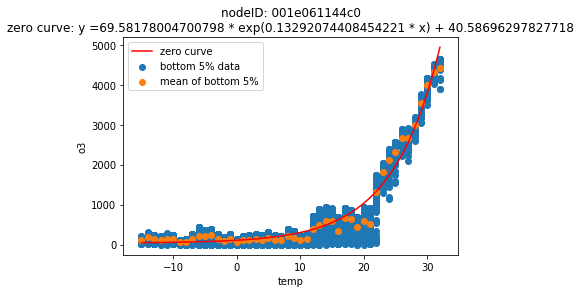

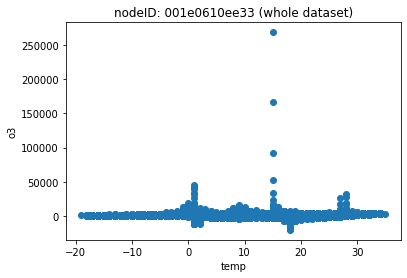

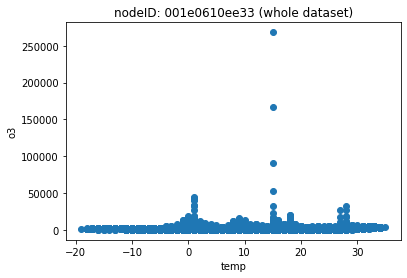

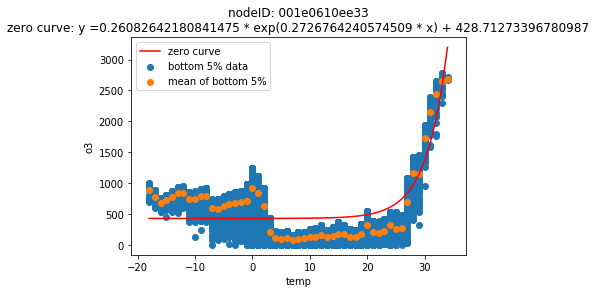

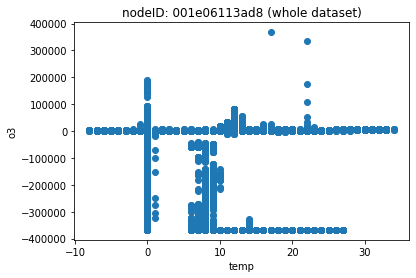

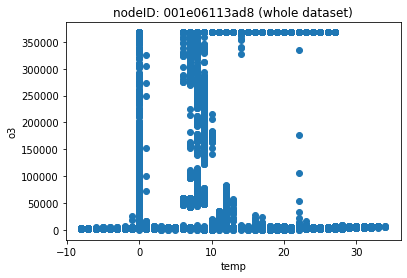

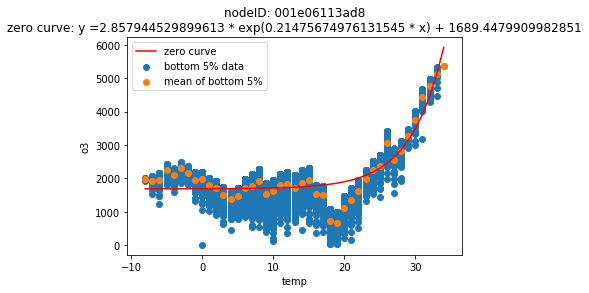

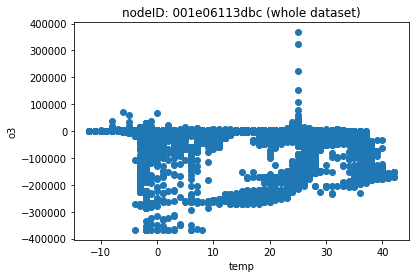

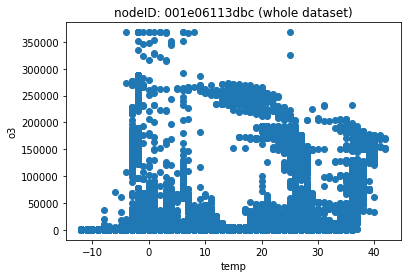

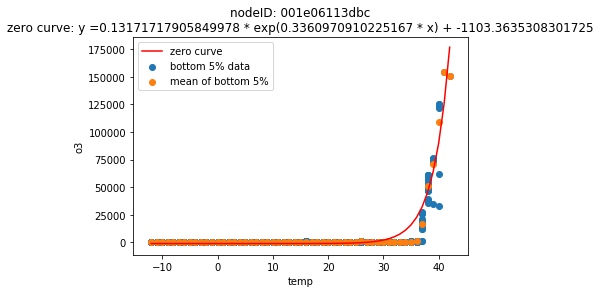

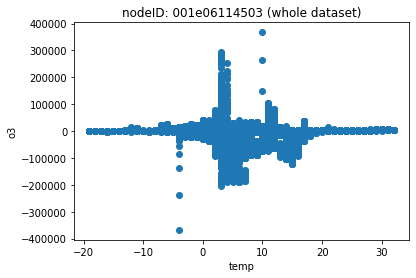

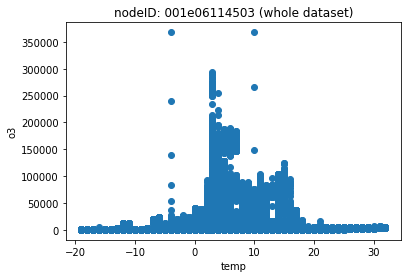

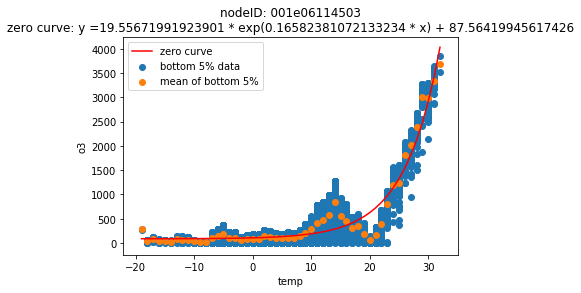

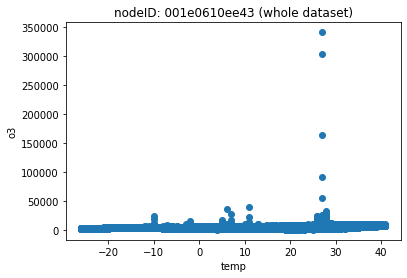

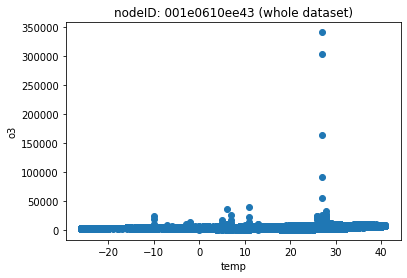

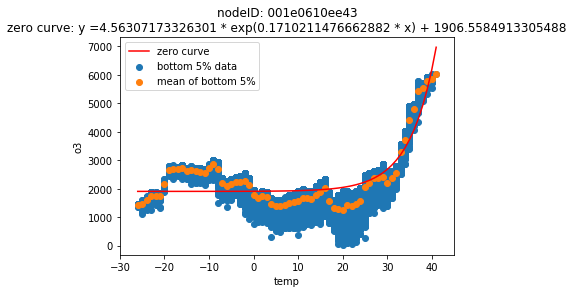

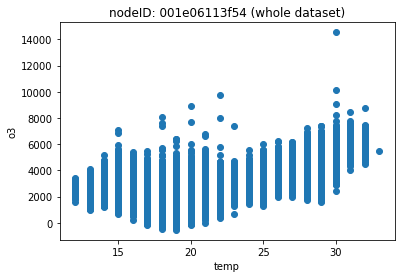

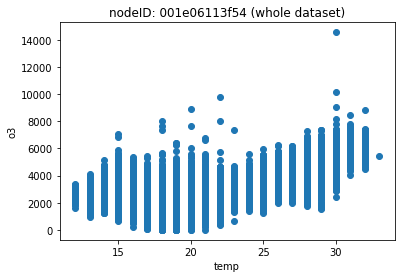

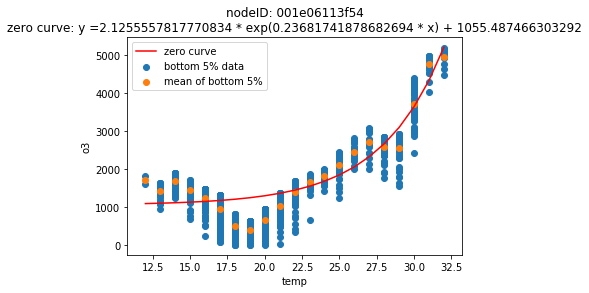

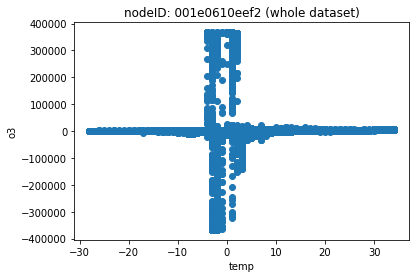

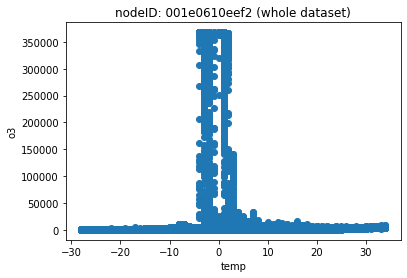

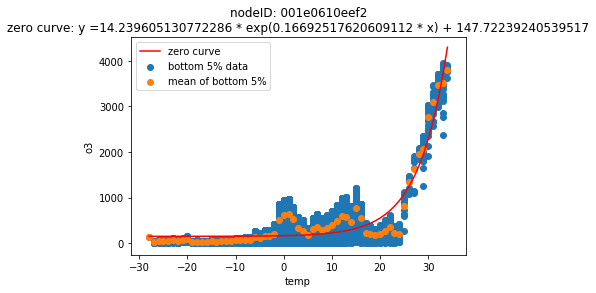

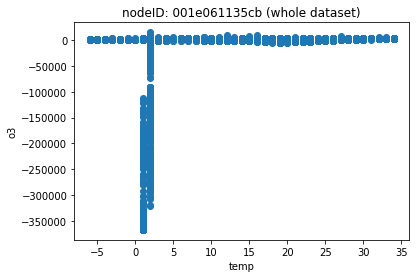

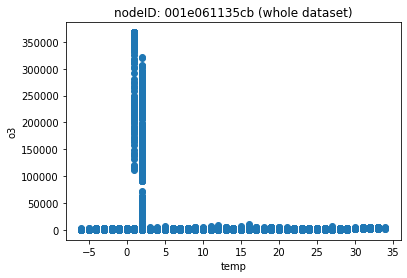

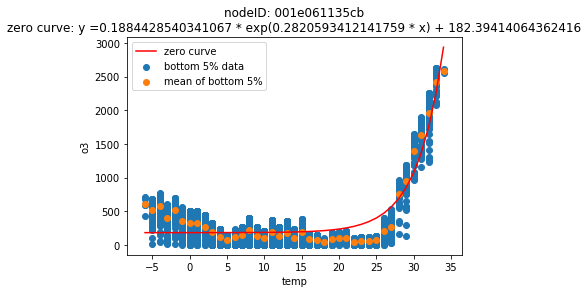

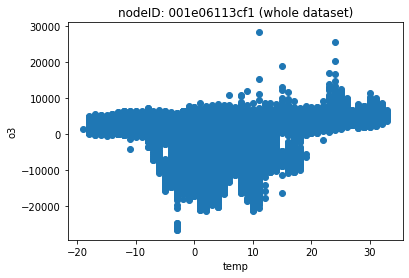

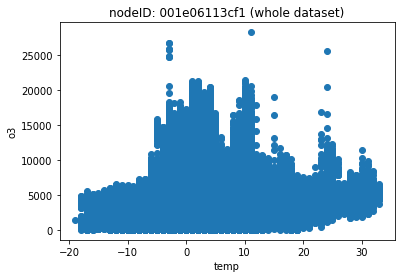

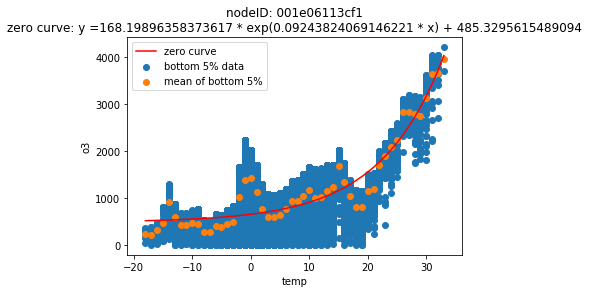

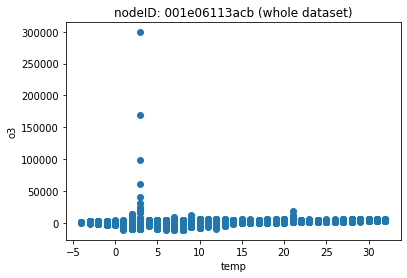

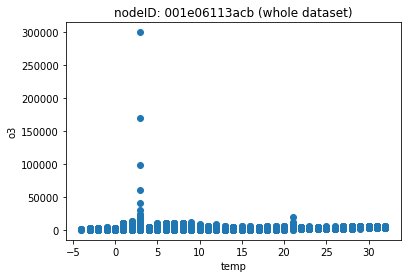

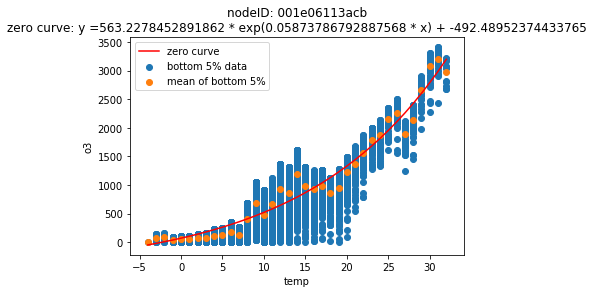

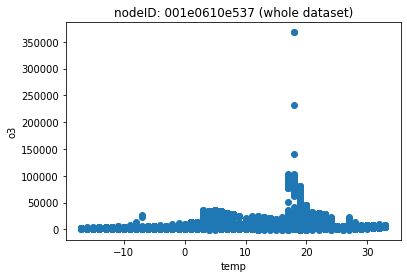

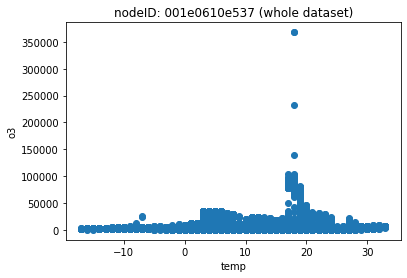

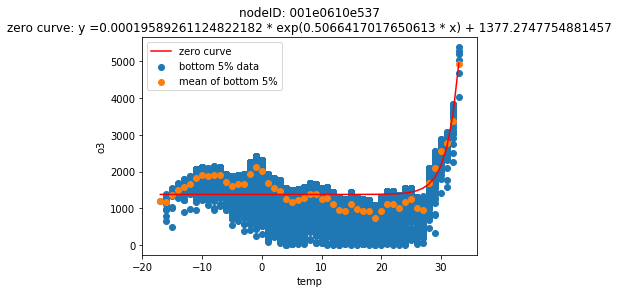

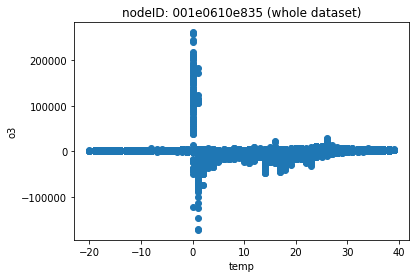

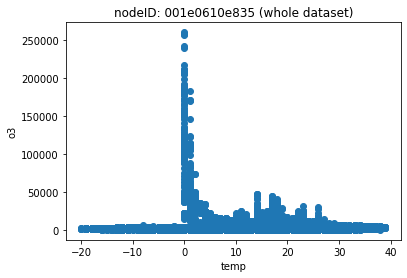

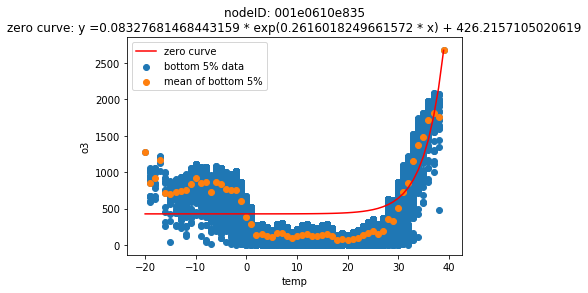

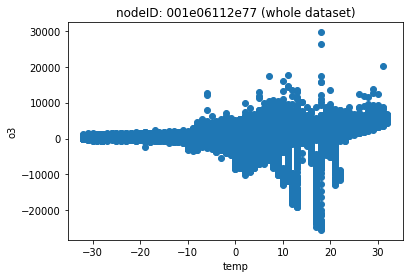

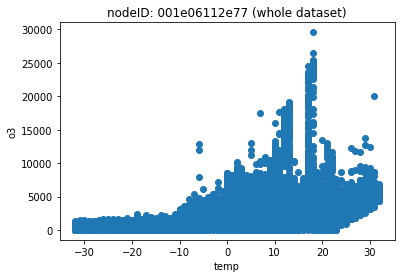

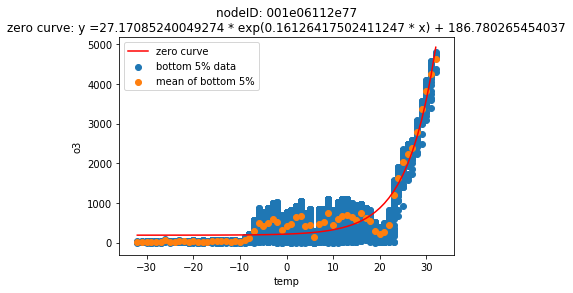

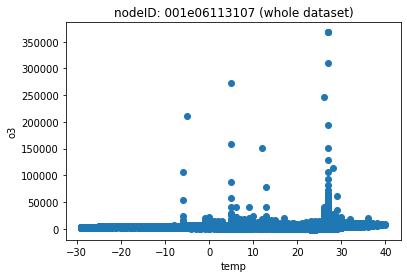

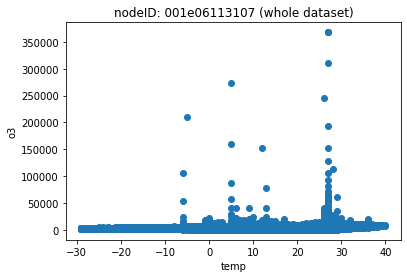

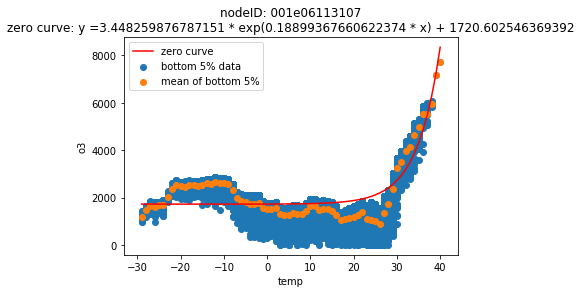

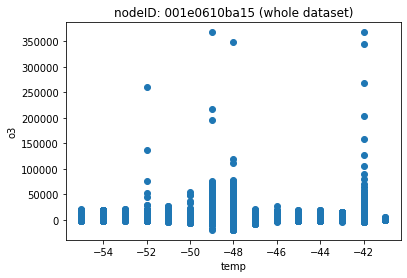

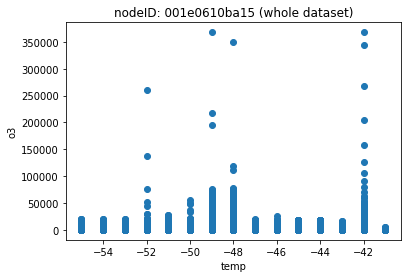

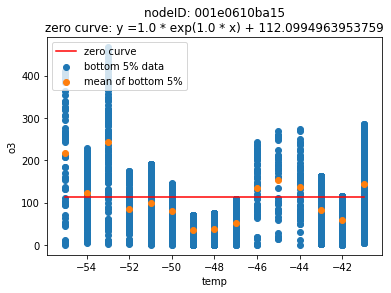

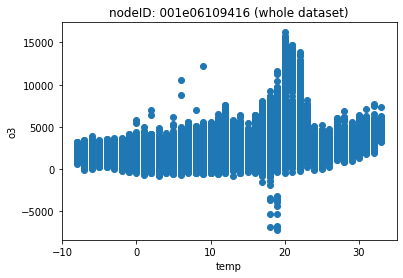

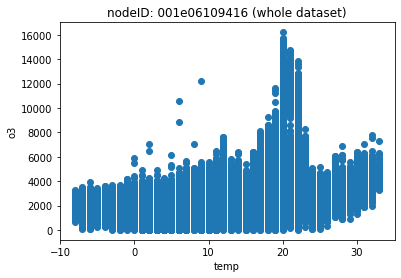

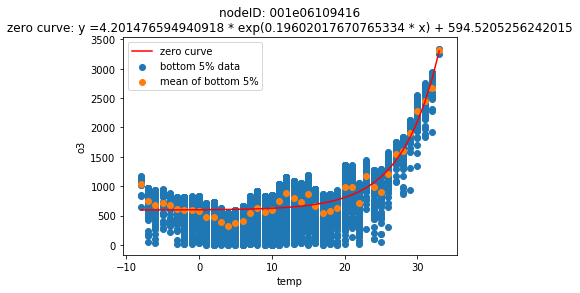

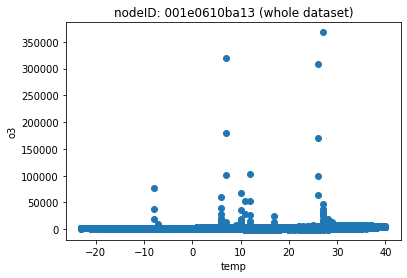

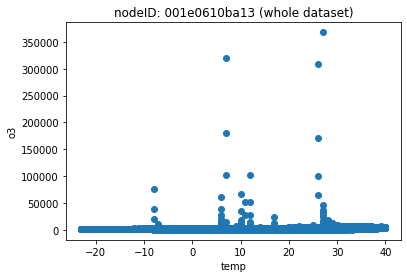

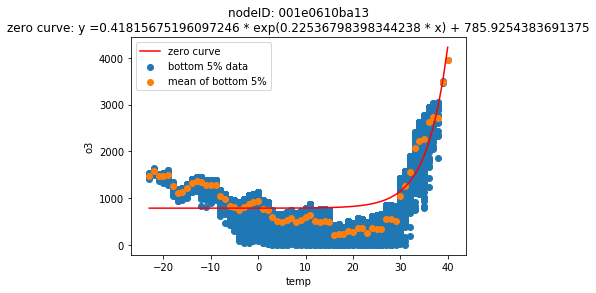

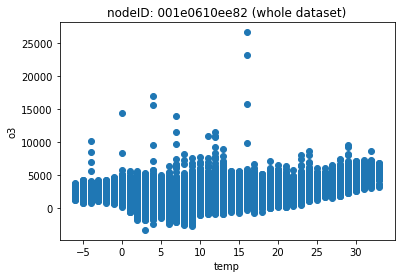

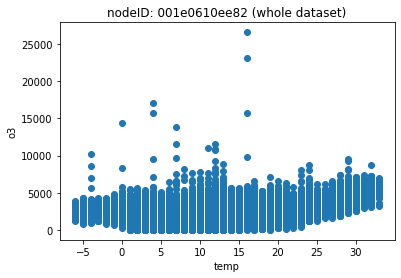

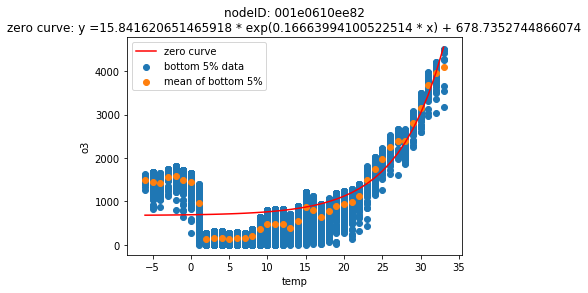

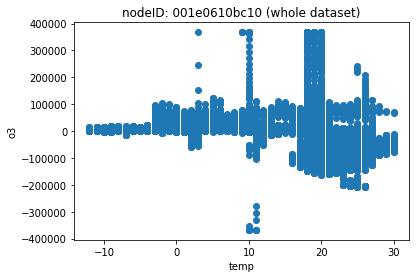

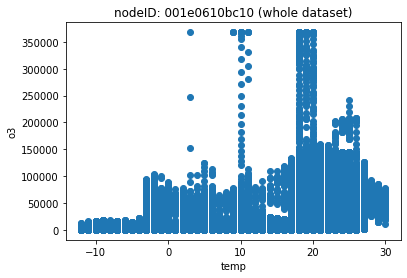

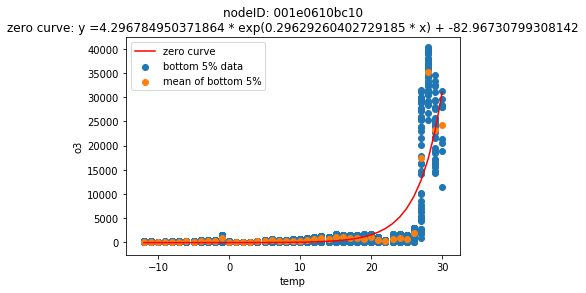

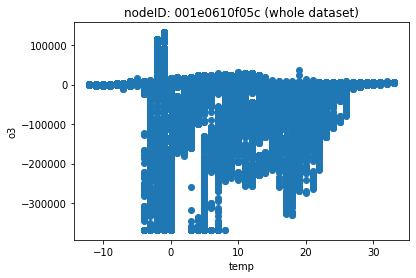

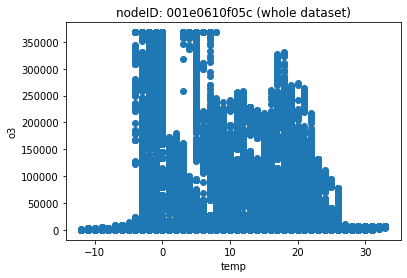

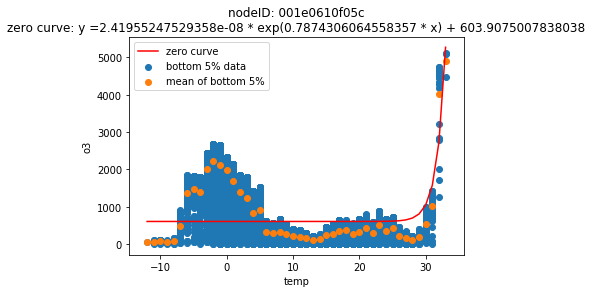

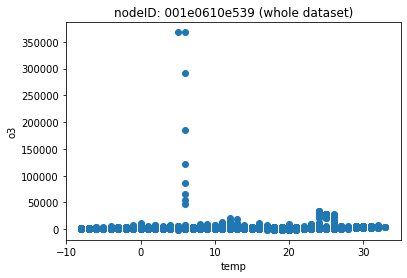

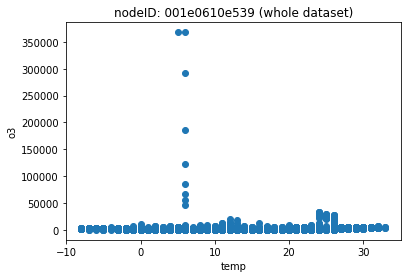

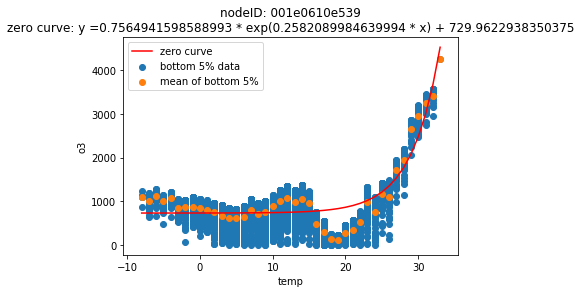

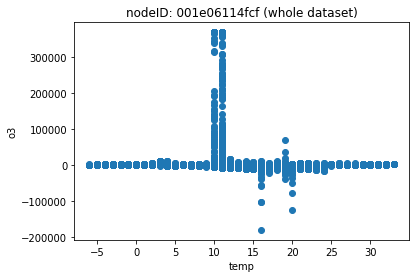

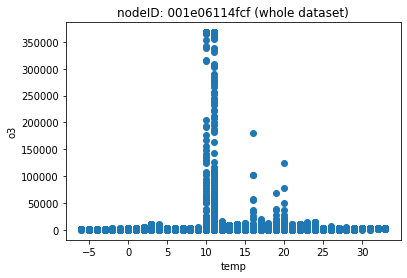

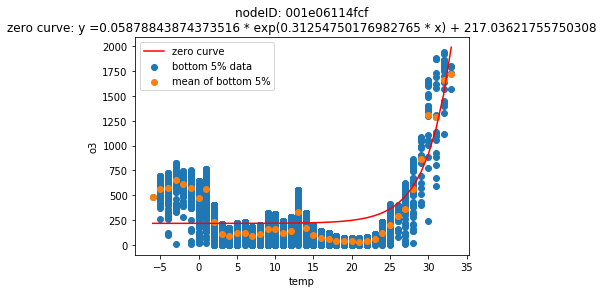

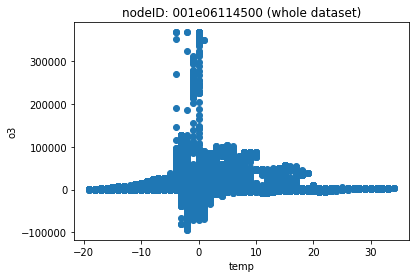

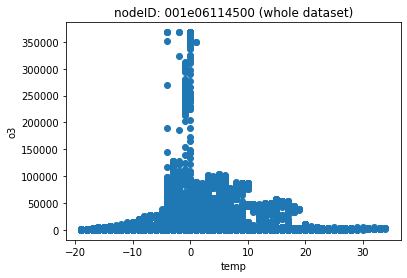

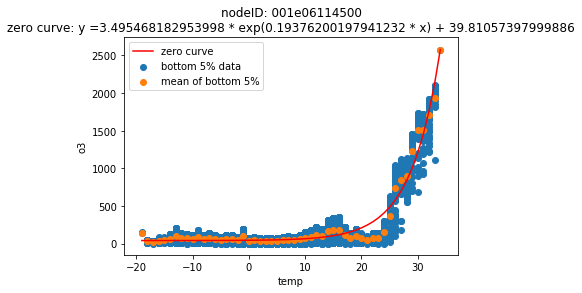

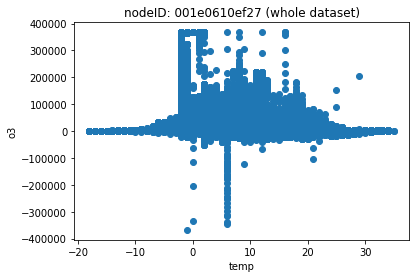

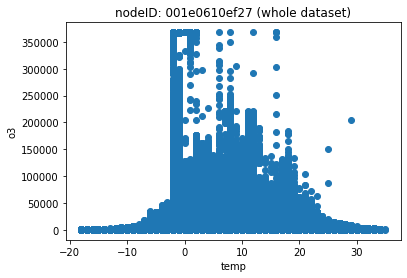

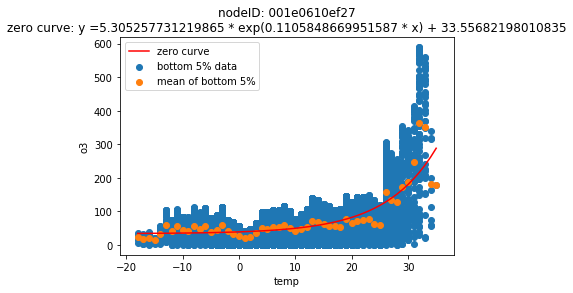

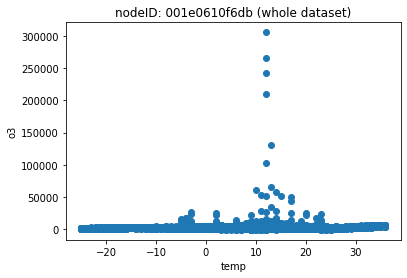

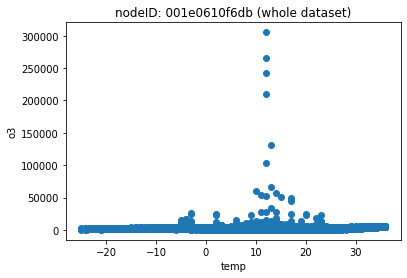

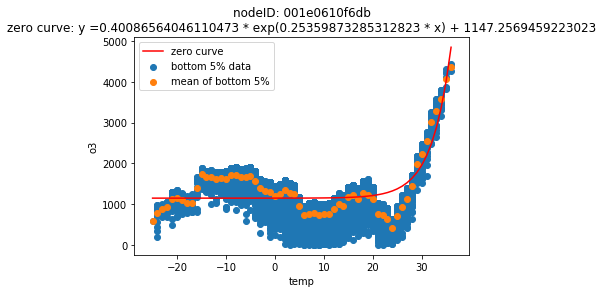

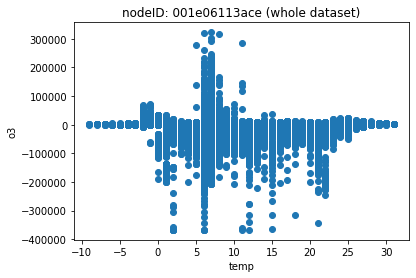

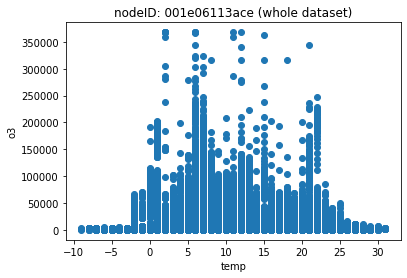

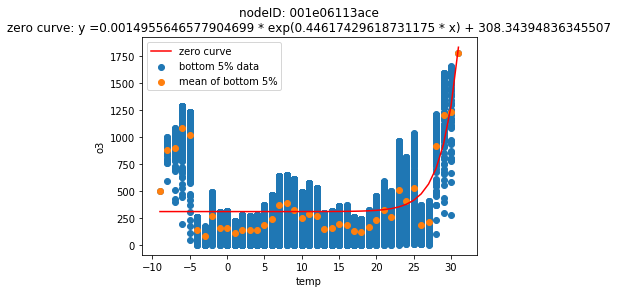

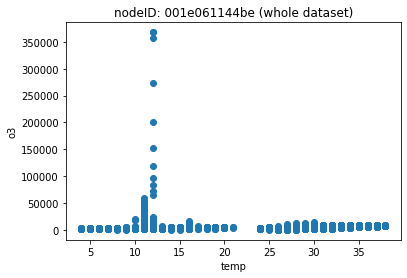

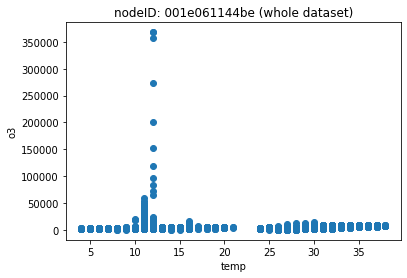

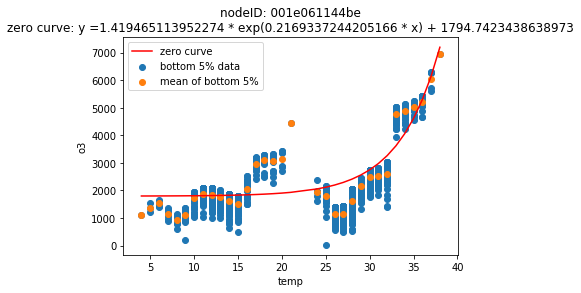

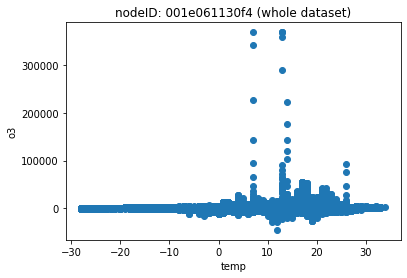

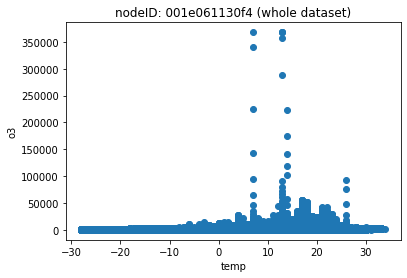

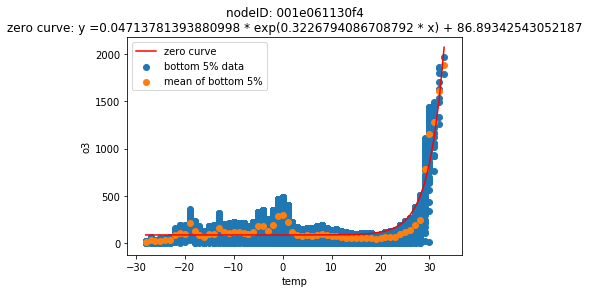

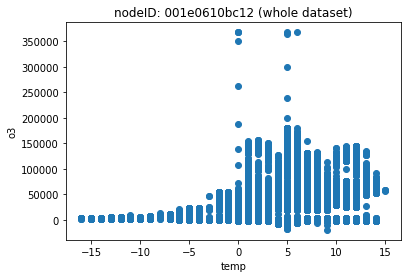

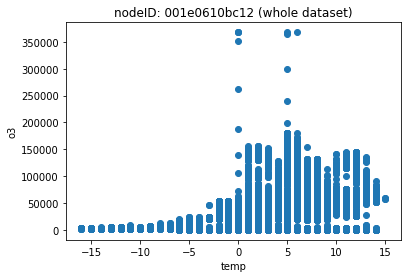

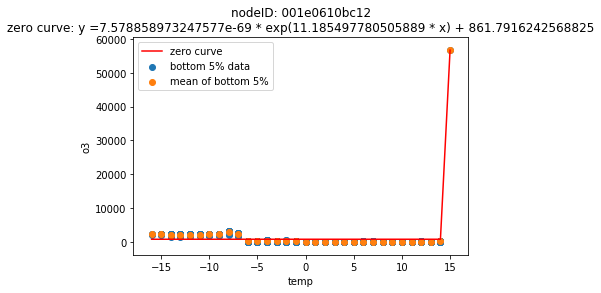

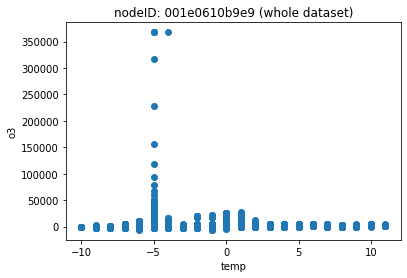

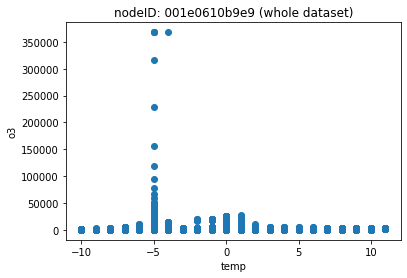

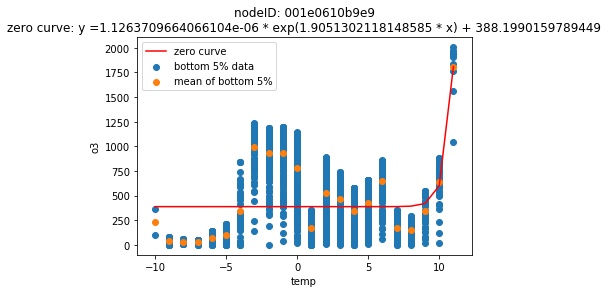

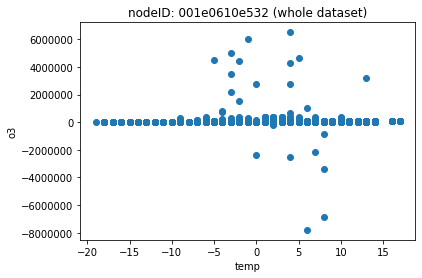

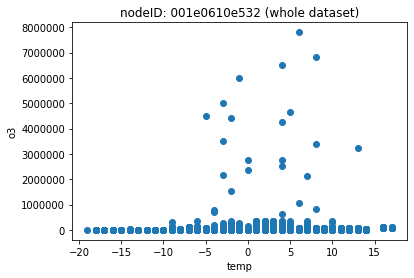

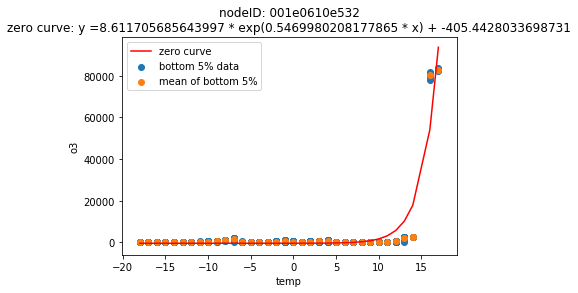

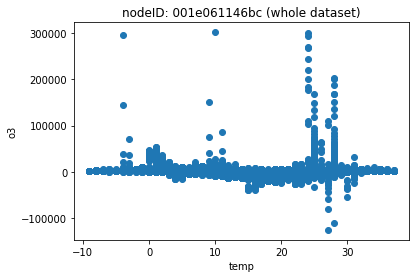

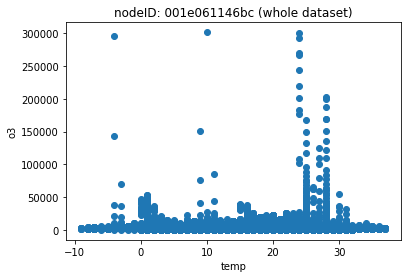

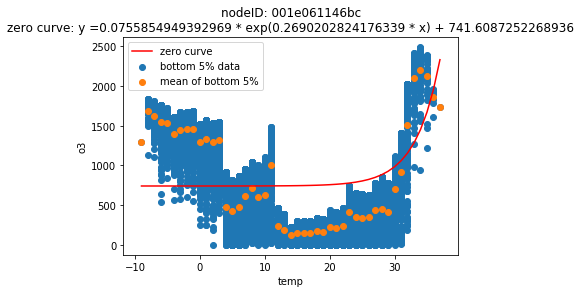

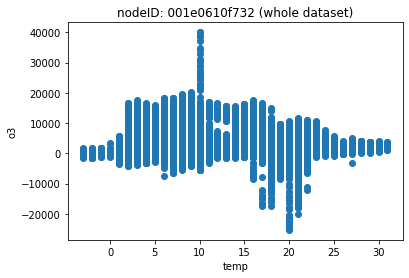

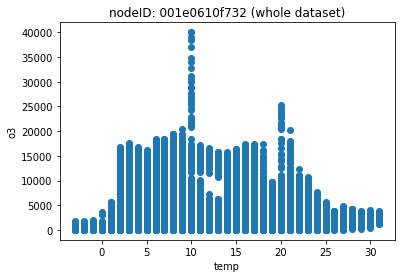

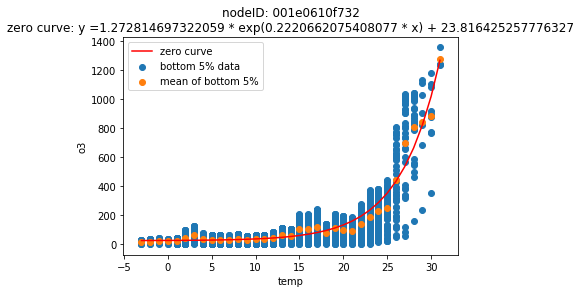

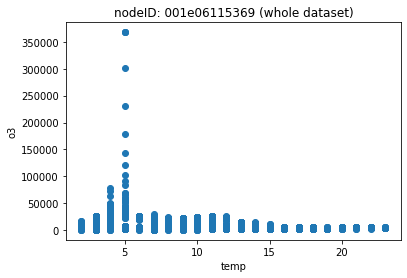

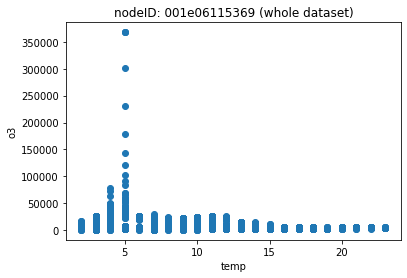

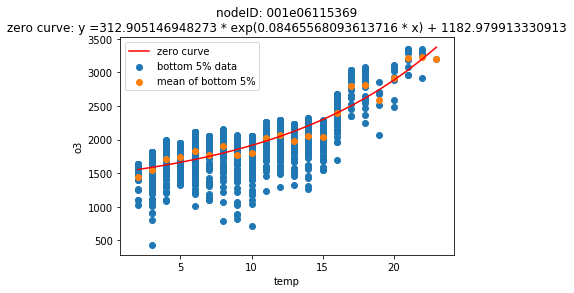

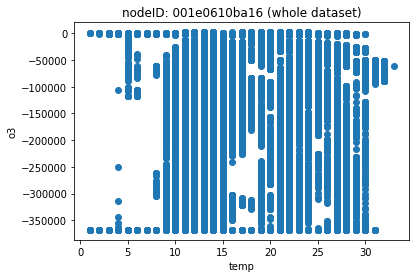

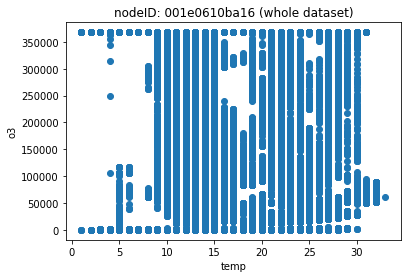

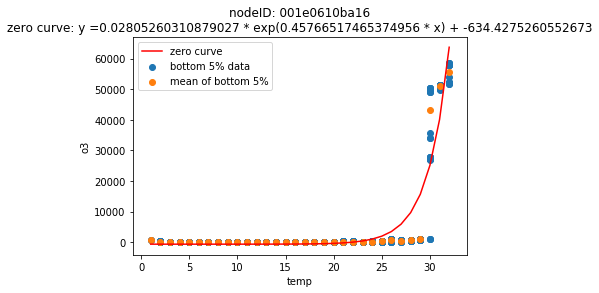

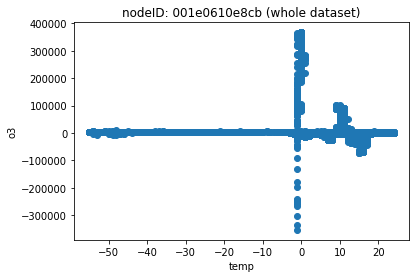

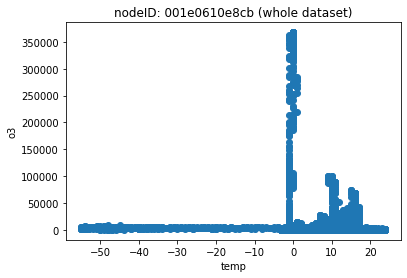

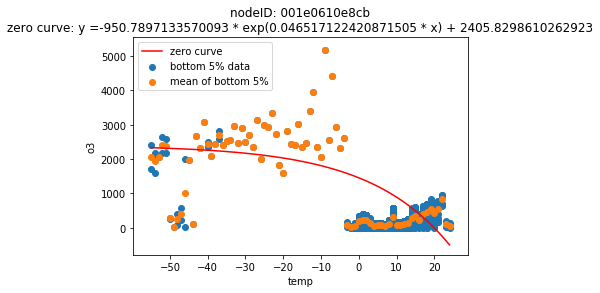

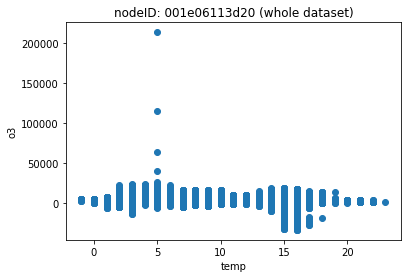

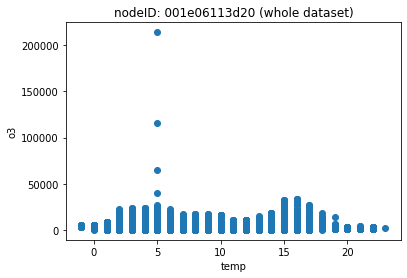

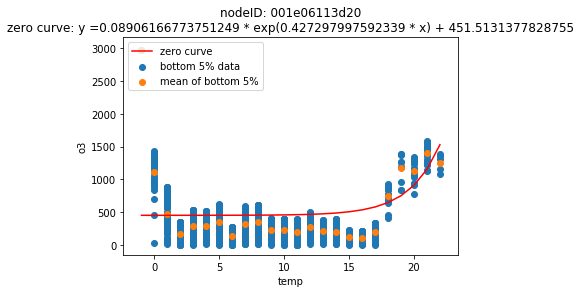

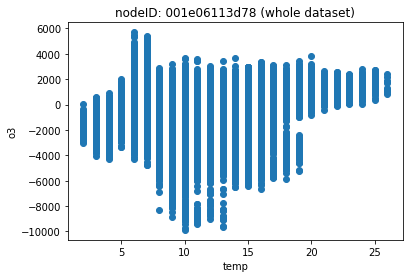

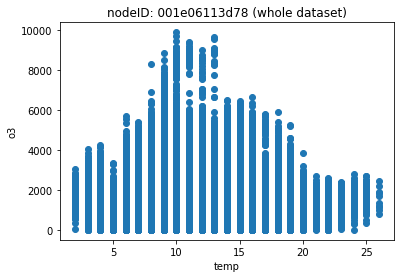

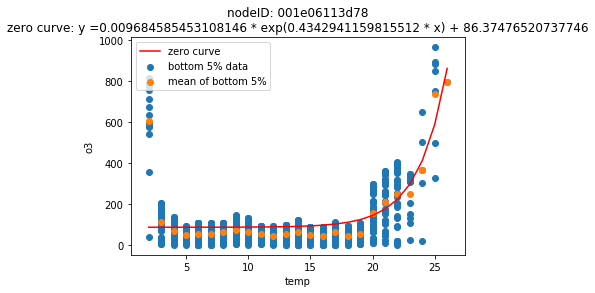

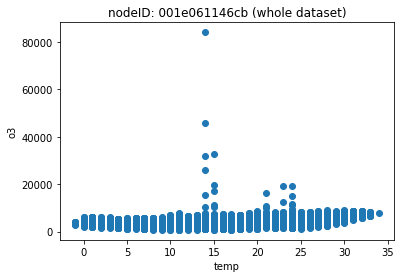

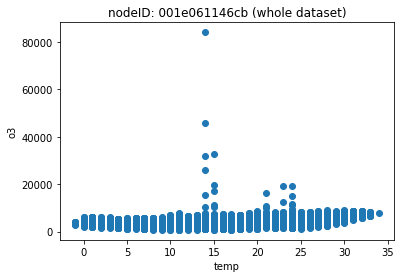

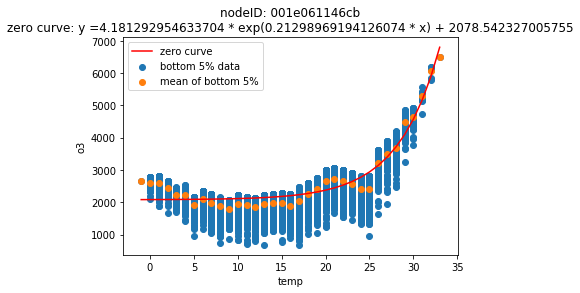

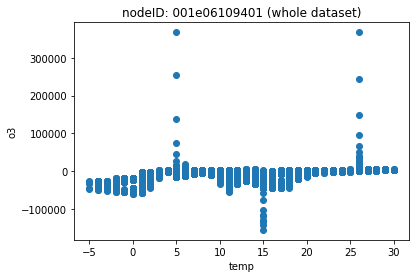

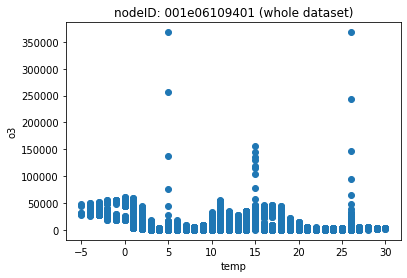

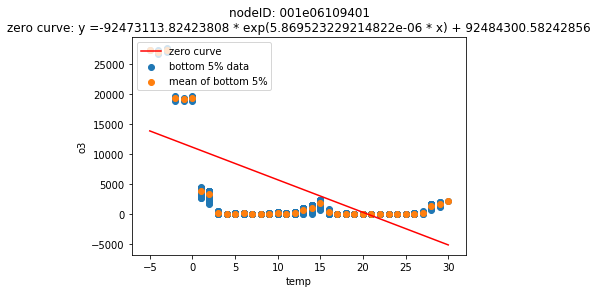

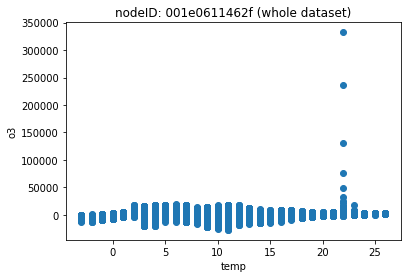

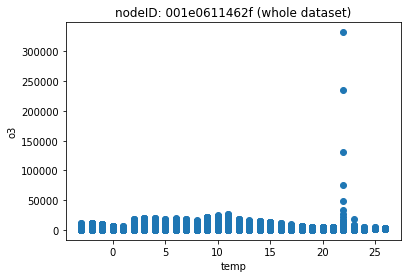

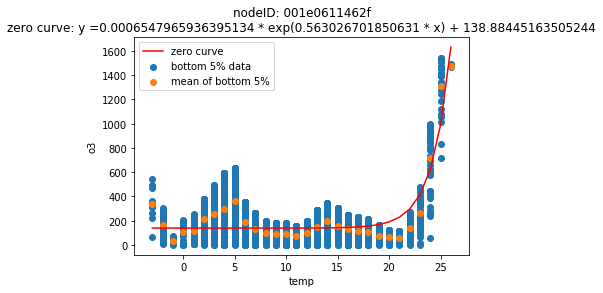

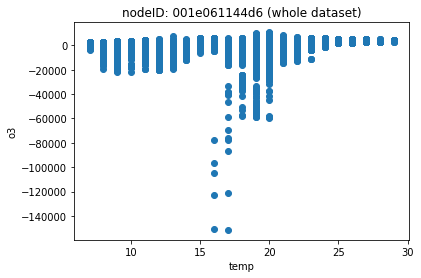

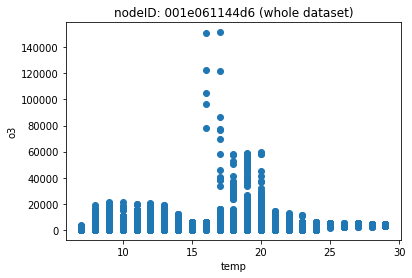

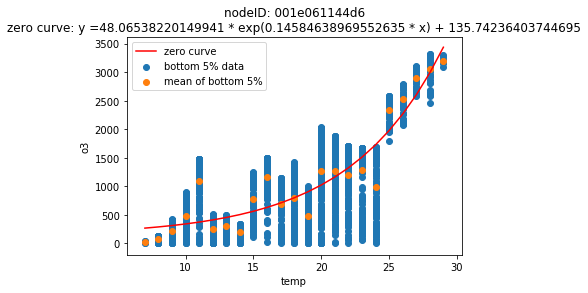

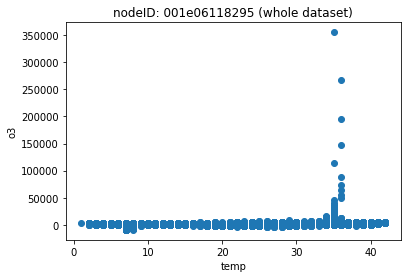

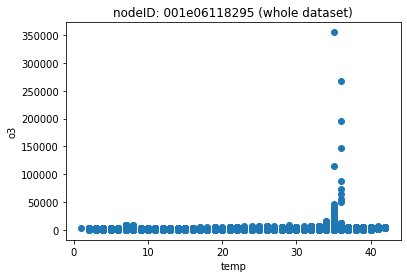

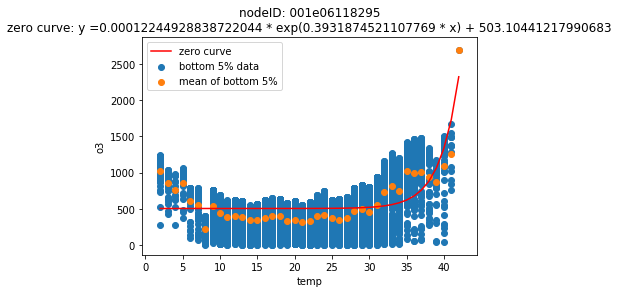

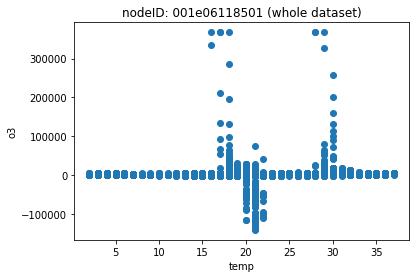

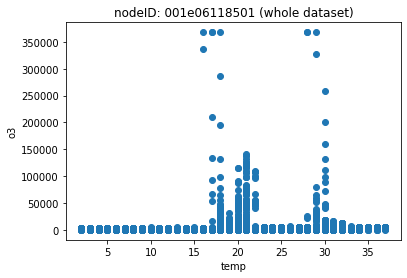

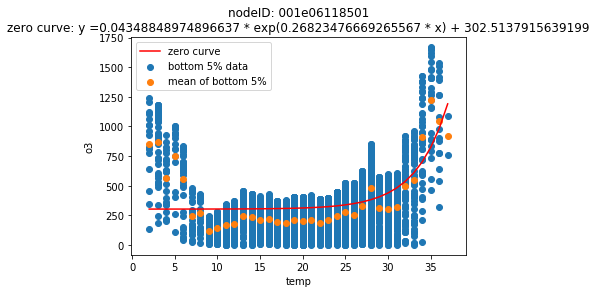

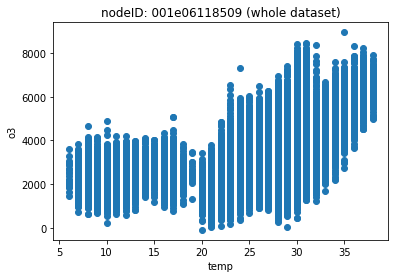

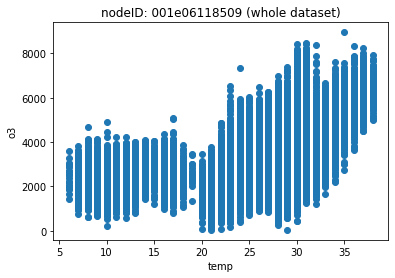

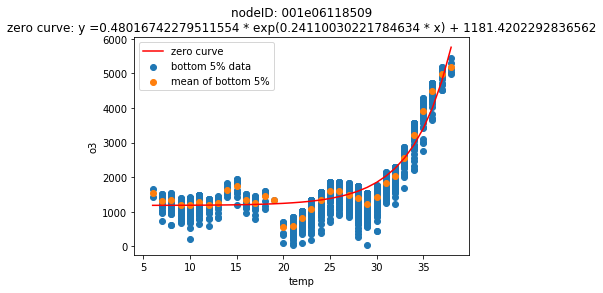

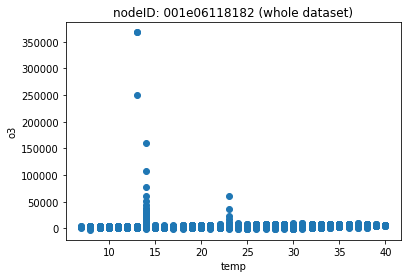

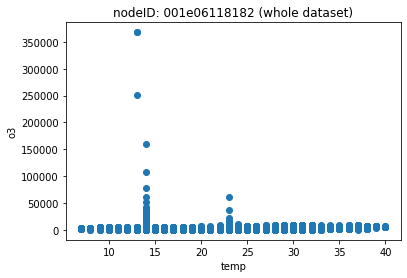

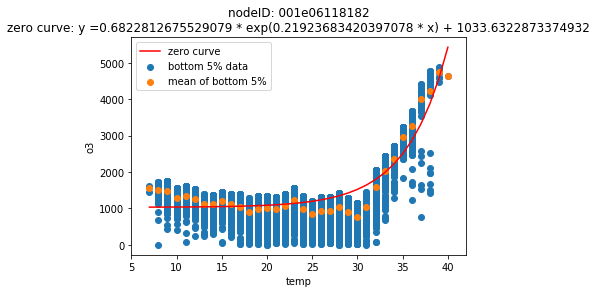

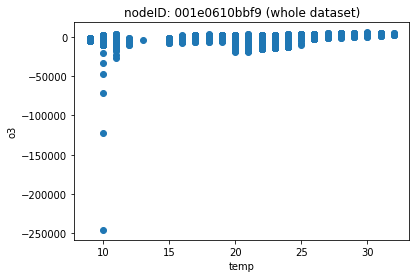

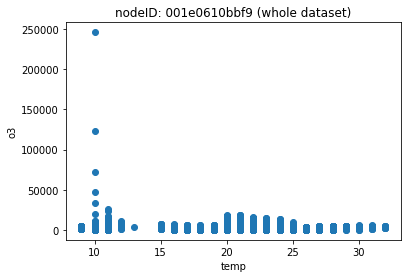

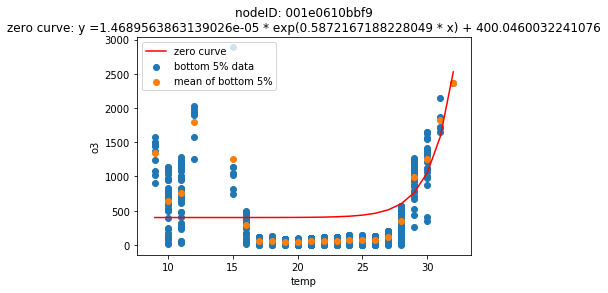

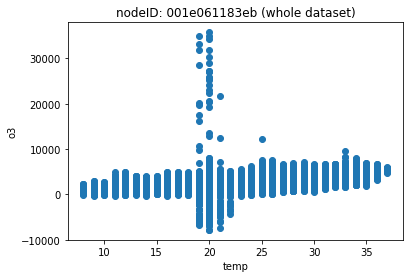

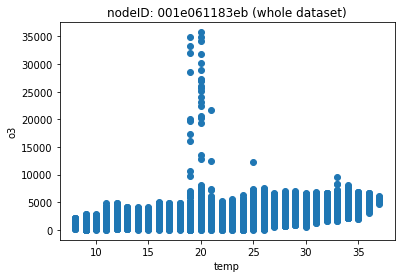

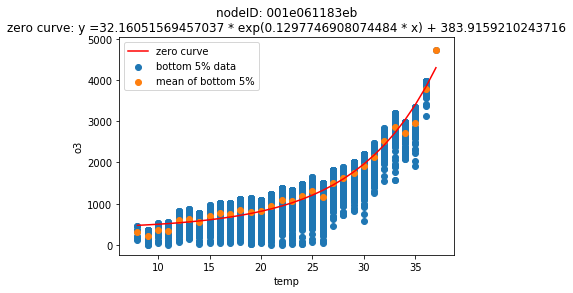

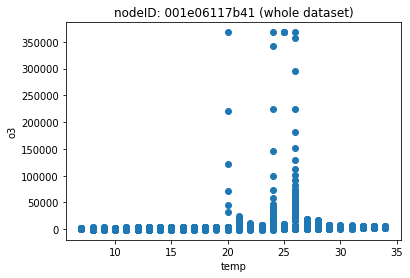

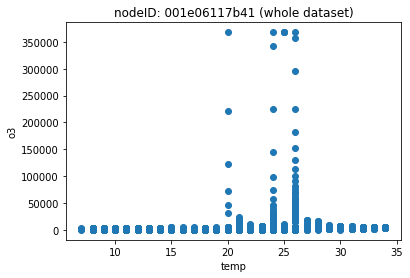

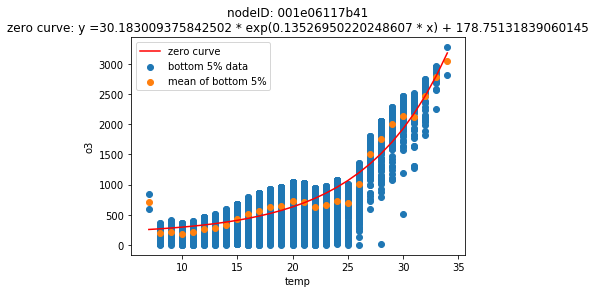

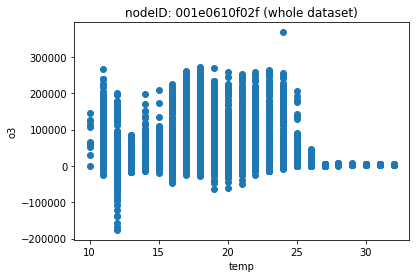

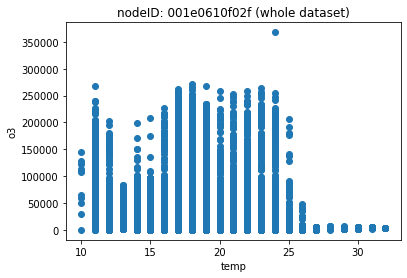

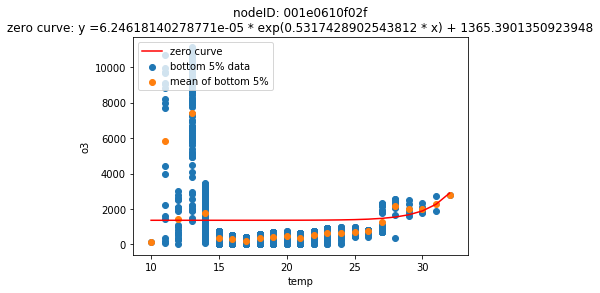

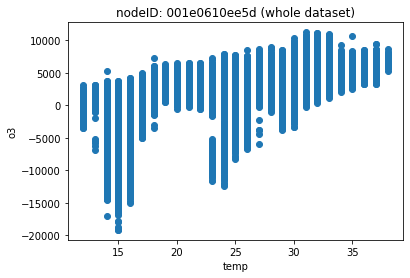

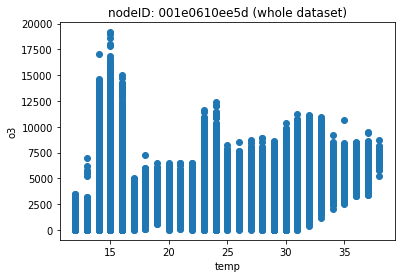

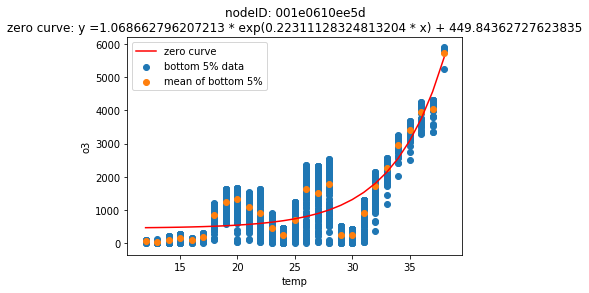

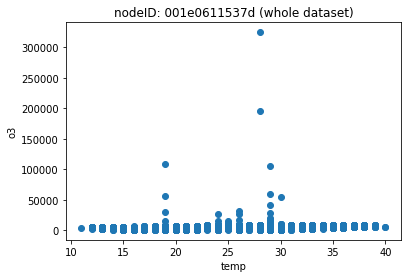

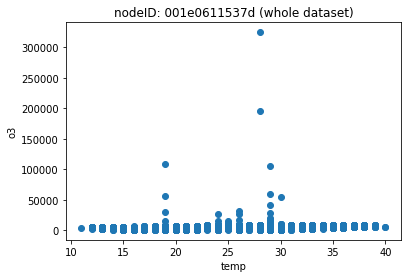

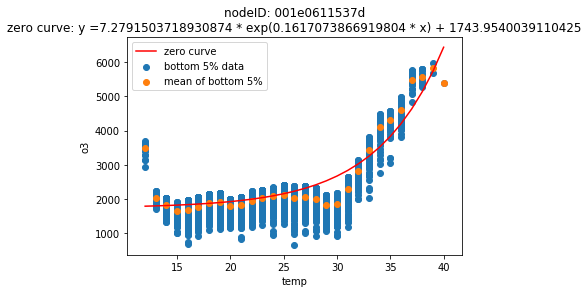

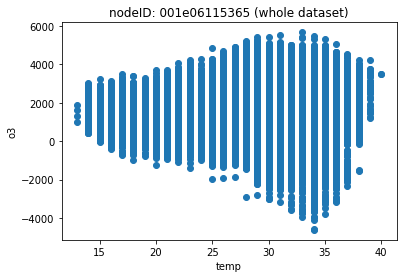

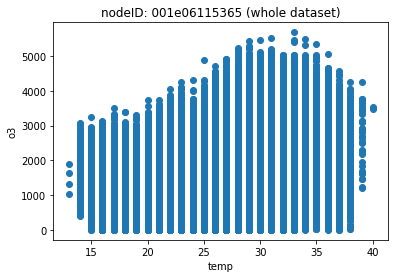

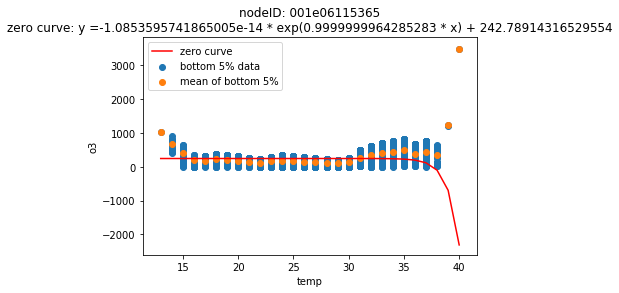

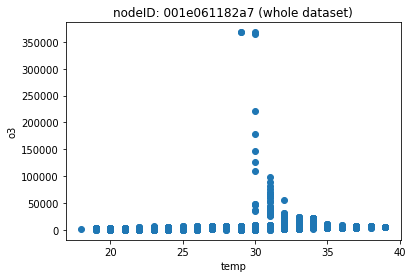

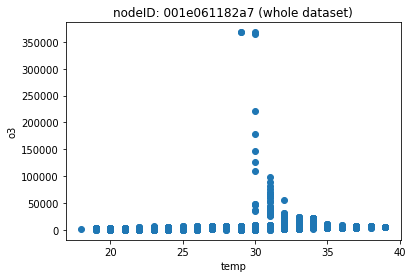

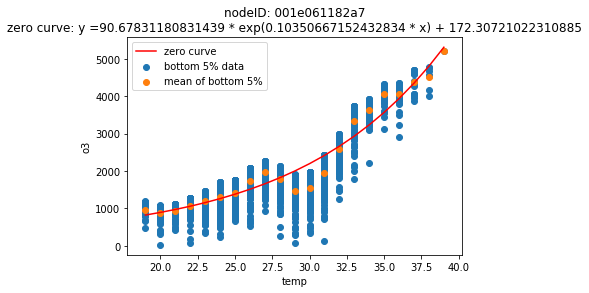

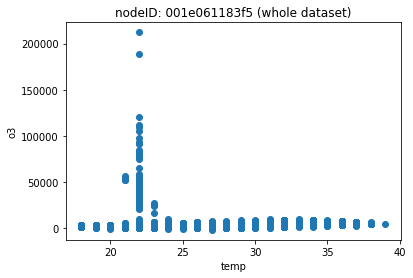

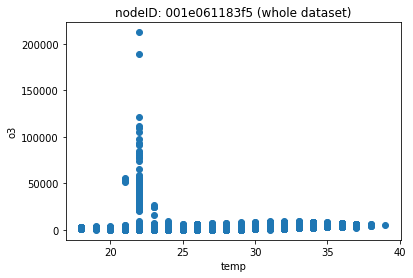

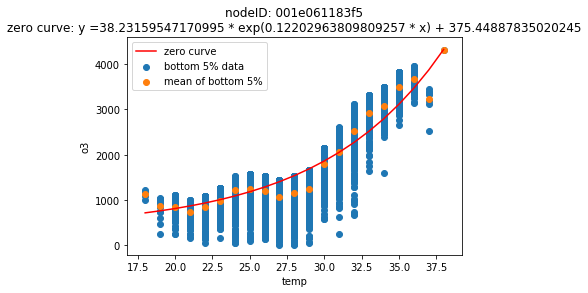

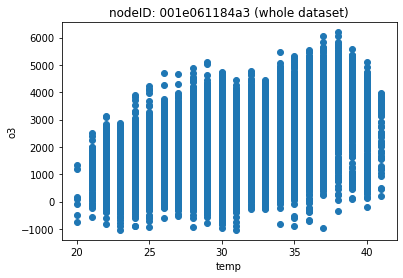

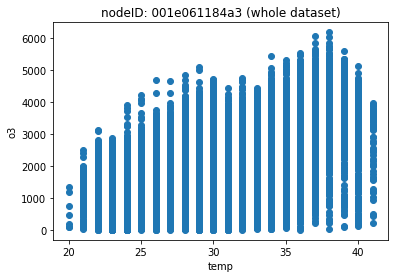

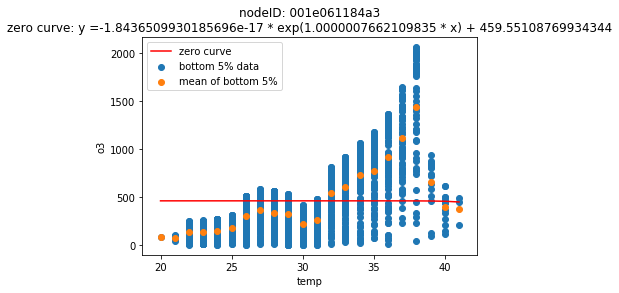

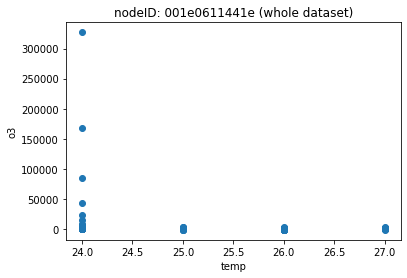

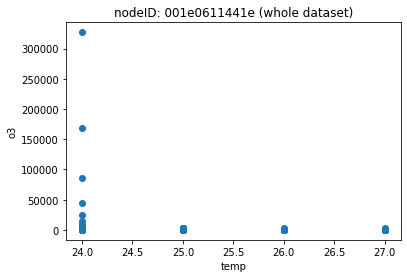

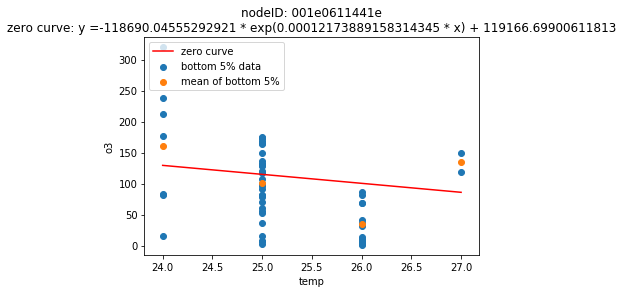

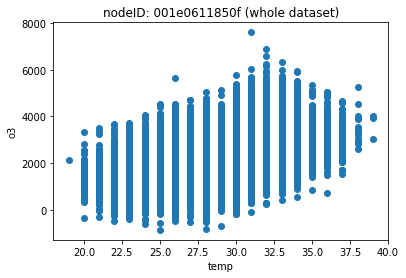

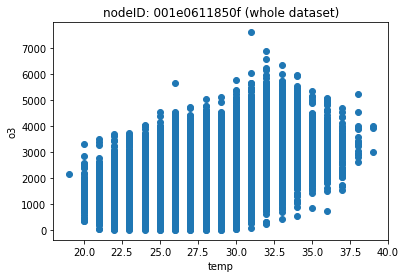

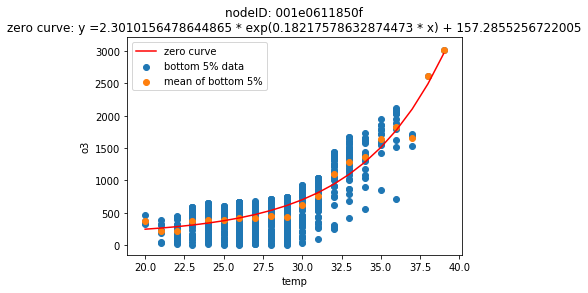

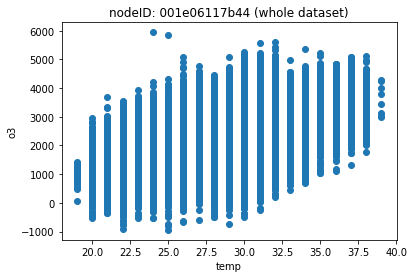

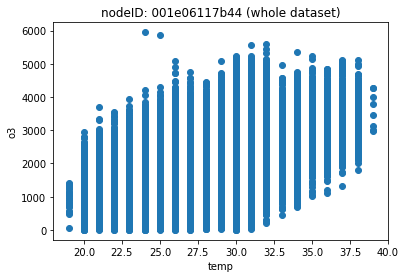

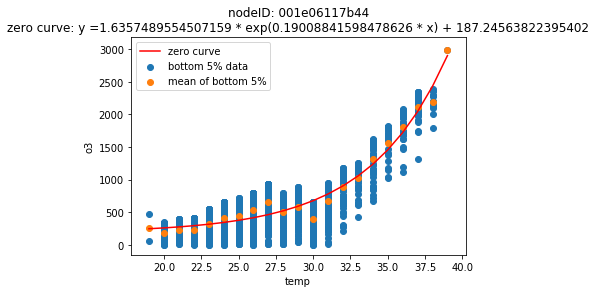

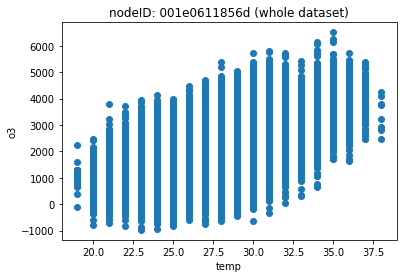

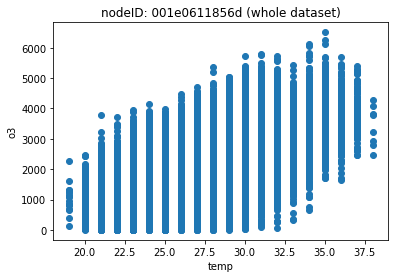

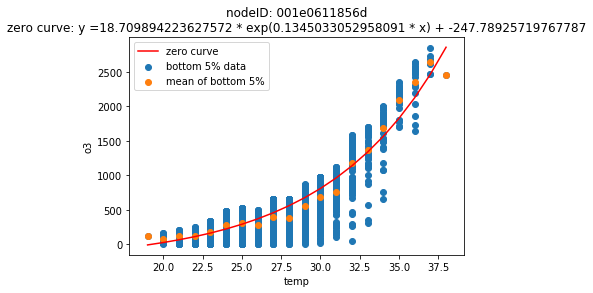

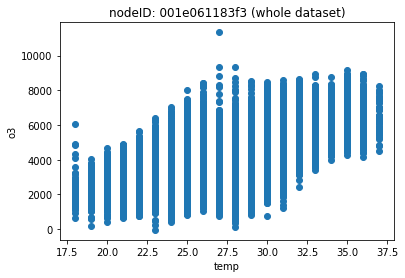

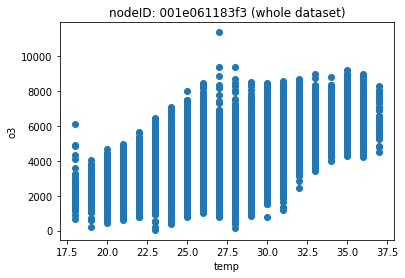

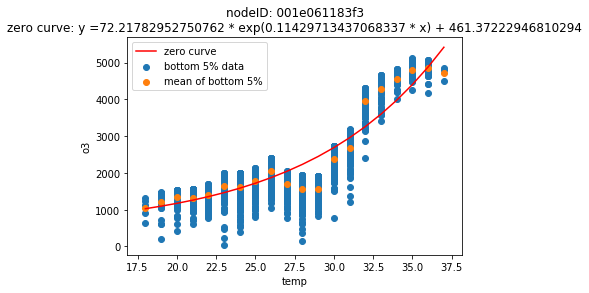

In [15]:
with open('curve_o3efficients_o3.csv', "w") as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(['y=a*exp(b*x)+c'])
    writer.writerow(['NodeID', 'a', 'b', 'c'])
    
    for i in range(o3_temp['node_id'].nunique()):

        node = pd.read_csv('nodedata_O3/'+nodes[i]+'.csv',header = 0, index_col=0)
        node['temp'] = round(node['temp'])
        node = node[~node['temp'].isna()]
        node = node.sort_values(by=['temp'])
        plt.figure()
        plt.scatter(node['temp'], node['o3_raw'])
        plt.title('nodeID: '+nodes[i] +' (whole dataset)')
        plt.xlabel('temp')
        plt.ylabel('o3')
        plt.savefig('node_pic_abs_o3/'+nodes[i]+'_1.png')
    
        node['abs_o3_raw'] = abs(node['o3_raw'])
        plt.figure()
        plt.scatter(node['temp'], node['abs_o3_raw'])
        plt.title('nodeID: '+nodes[i] +' (whole dataset)')
        plt.xlabel('temp')
        plt.ylabel('o3')
        plt.savefig('node_pic_abs_o3/'+nodes[i]+'_2.png')
       
        node_bottom = node[(node['abs_o3_raw'] < node.groupby('temp')['abs_o3_raw'].transform(lambda x: x.quantile(0.05)))]
        node_bottom_mean = node_bottom.groupby('temp').mean().reset_index()
    
        xdata = np.array(node_bottom_mean['temp'])
        ydata = np.array(node_bottom_mean['abs_o3_raw'])
        popt, po3v = curve_fit(func, xdata, ydata, maxfev = 50000)
        
        writer.writerow([nodes[i], str(popt[0]), str(popt[1]), str(popt[2])])
        
        plt.figure()
        plt.scatter(node_bottom['temp'], node_bottom['abs_o3_raw'], label='bottom 5% data') #show scatter plot of original data
        plt.scatter(node_bottom_mean['temp'], node_bottom_mean['abs_o3_raw'],label='mean of bottom 5%') 
        plt.plot(xdata,func(xdata, *popt),'r-', label='zero curve')
        plt.xlabel('temp')
        plt.ylabel('o3')
        plt.title('nodeID: '+nodes[i] +'\n'+
         'zero curve: y =' + str(popt[0]) + ' * exp('+ str(popt[1]) + ' * x)' + ' + ' + str(popt[2]))
        plt.legend(loc=2)
        plt.savefig('node_pic_abs_o3/'+nodes[i]+'_3.png')
        print(i)
        